In [5]:
def get_frames(speech, hop, window_length):
    
    frames = np.zeros((len(speech) // hop, window_length)) 
    
    for i in range(len(frames)):
        # 0~23까지 이전 데이터, 23~ 103 까지는 현재 데이터, 104~123까지는 zero-padding.
        frames[i, :24] = frames[i-1, -48:-24] # * np.hanning(48) # 처음 샘플 24개는 이전 프레임의 24개로부터 얻어짐.
        frames[i, 24:104] = speech[i*hop:i*hop+80] # 80개 샘플은 rectangular window
        frames[i, 104:] = 0
    
    return frames

In [6]:
import numpy as np
from scipy.io import wavfile
import librosa
import librosa.display
import matplotlib.pyplot as plt

# load the speech signal
fs, speech = wavfile.read('speech1.wav')

print('fs, speech', fs, len(speech))

# LP filter
h = np.ones(11) / 11

# parameter setting.
hop = 80 # Frame shift
window_length = 128 #window length


# get frames
frames = get_frames(speech, hop, window_length)

# window design
window = np.concatenate([np.hanning(48)[:24], np.ones(80), np.hanning(48)[24:]])

# windowing
windowed_frames = frames * window


# Speech FFT
fft_frames = np.fft.fft(windowed_frames, axis=1)

# LPF FFT
fft_filter = np.fft.fft(h, window_length)

# Multiply Speech and LPF
filtered_frames = np.real(np.fft.ifft(fft_frames * fft_filter, axis=1))

# reconstruct
reconstructed_signal = np.zeros(len(speech) + 48) # 원래 시그널의 길이보다 48개의 샘플이 더 발생함.

for i in range(len(frames)):
    reconstructed_signal[i*hop:i*hop+window_length] += filtered_frames[i, :]

    

# 파일 저장.
wavfile.write('reconstructed_signal_without_lpf.wav', fs, reconstructed_signal.astype(np.int16))

fs, speech 16000 911680


C:\Users\New\AppData\Local\Temp\ipykernel_16840\1050104689.py:8: WavFileWarning: Chunk (non-data) not understood, skipping it.
  fs, speech = wavfile.read('speech1.wav')


PermissionError: [Errno 13] Permission denied: 'reconstructed_signal_without_lpf.wav'

# Comparison of the plot of the magnitude spectrum of the output signal for  200th frame with and without (=rectangular window of length 104) window

In [7]:
two_hundred_frame = frames[199] # 0부터 시작하기때문에 199

custom_window = np.concatenate([np.hanning(48)[:24], np.ones(80), np.hanning(48)[24:]])
rect_window = np.ones(128)

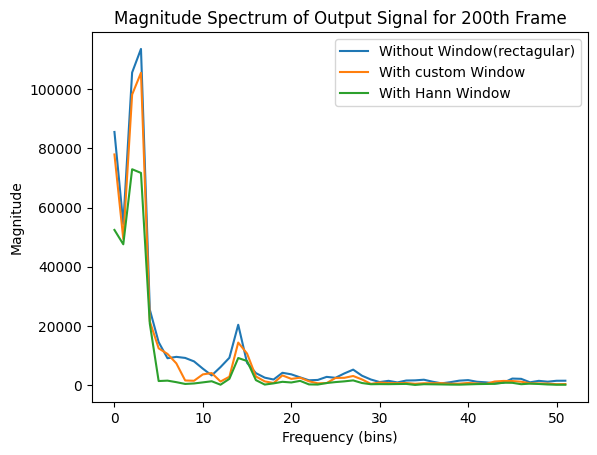

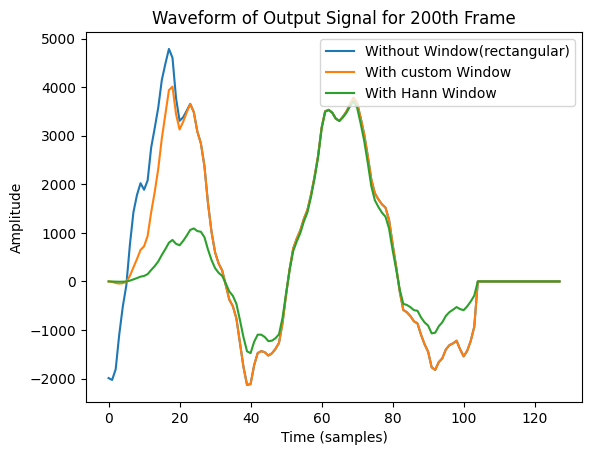

In [8]:
fft_without_window = np.fft.fft(two_hundred_frame[:128] * rect_window) # without window
fft_with_custom_window = np.fft.fft(two_hundred_frame[:128] * custom_window) # with window
fft_with_hann_window = np.fft.fft(two_hundred_frame[:128] * np.hanning(128)) # with window

# compute the magnitudes of the FFT
magnitude_without_window = np.abs(fft_without_window)
magnitude_with_custom_window = np.abs(fft_with_custom_window)
magnitude_with_hann_window = np.abs(fft_with_hann_window)


# plot the magnitude spectra
plt.plot(magnitude_without_window[:52], label='Without Window(rectagular)')
plt.plot(magnitude_with_custom_window[:52], label='With custom Window')
plt.plot(magnitude_with_hann_window[:52], label='With Hann Window')
plt.title('Magnitude Spectrum of Output Signal for 200th Frame')
plt.xlabel('Frequency (bins)')
plt.ylabel('Magnitude')
plt.legend()
plt.show()

# plot the waveforms
plt.plot(two_hundred_frame[:128] * rect_window, label='Without Window(rectangular)')
plt.plot(two_hundred_frame[:128] * custom_window, label='With custom Window')
plt.plot(two_hundred_frame[:128] * np.hanning(128), label='With Hann Window')
plt.title('Waveform of Output Signal for 200th Frame')
plt.xlabel('Time (samples)')
plt.ylabel('Amplitude')
plt.legend()
plt.show()

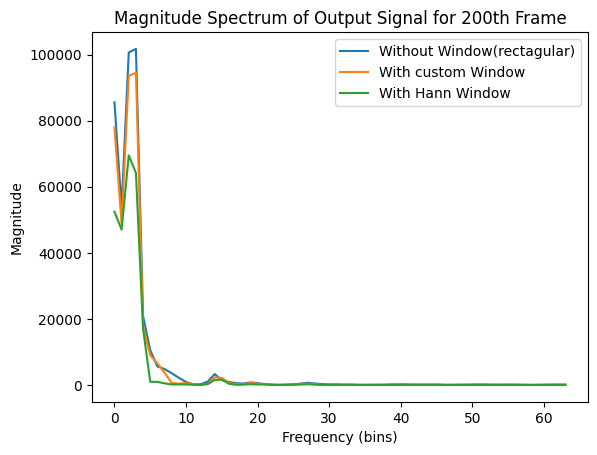

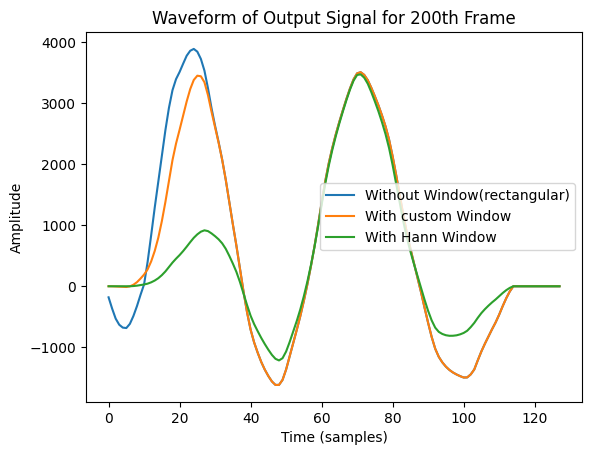

In [12]:
fft_without_window = np.fft.fft(two_hundred_frame[:128] * rect_window) # without window
fft_with_custom_window = np.fft.fft(two_hundred_frame[:128] * custom_window) # with window
fft_with_hann_window = np.fft.fft(two_hundred_frame[:128] * np.hanning(128)) # with window

# compute the magnitudes of the FFT
magnitude_without_window = np.abs(fft_without_window * fft_filter)
magnitude_with_custom_window = np.abs(fft_with_custom_window * fft_filter)
magnitude_with_hann_window = np.abs(fft_with_hann_window * fft_filter)

without_window = np.real(np.fft.ifft(fft_without_window * fft_filter, axis=0))
with_custom_window = np.real(np.fft.ifft(fft_with_custom_window * fft_filter, axis=0))
with_hann_window = np.real(np.fft.ifft(fft_with_hann_window * fft_filter, axis=0))

# plot the magnitude spectra
plt.plot(magnitude_without_window[:64], label='Without Window(rectagular)')
plt.plot(magnitude_with_custom_window[:64], label='With custom Window')
plt.plot(magnitude_with_hann_window[:64], label='With Hann Window')
plt.title('Magnitude Spectrum of Output Signal for 200th Frame')
plt.xlabel('Frequency (bins)')
plt.ylabel('Magnitude')
plt.legend()
plt.show()

# plot the waveforms
plt.plot(without_window, label='Without Window(rectangular)')
plt.plot(with_custom_window, label='With custom Window')
plt.plot(with_hann_window, label='With Hann Window')
plt.title('Waveform of Output Signal for 200th Frame')
plt.xlabel('Time (samples)')
plt.ylabel('Amplitude')
plt.legend()
plt.show()

In [13]:
wavfile.write('without_window.wav', fs, without_window.astype(np.int16))
wavfile.write('with_custom_window.wav', fs, with_custom_window.astype(np.int16))
wavfile.write('with_hann_window.wav', fs, with_hann_window.astype(np.int16))